# Практична робота: Нейронні мережі з TensorFlow

## Завдання 1: Створення та навчання простої нейромережі MLP для класифікації

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Генерація даних
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Навчання
history_adam = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test), verbose=2)

# Оцінка
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Точність моделі (Adam): {accuracy:.4f}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
80/80 - 1s - loss: 0.5234 - accuracy: 0.7912 - val_loss: 0.3952 - val_accuracy: 0.8300 - 1s/epoch - 18ms/step
Epoch 2/20
80/80 - 0s - loss: 0.3288 - accuracy: 0.8687 - val_loss: 0.3614 - val_accuracy: 0.8250 - 190ms/epoch - 2ms/step
Epoch 3/20
80/80 - 0s - loss: 0.3035 - accuracy: 0.8700 - val_loss: 0.3647

## Завдання 2: Використання інших оптимізаторів (SGD, RMSprop) та порівняння результатів

In [2]:
import matplotlib.pyplot as plt

# Модель з оптимізатором SGD
model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція з SGD
model_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model_sgd.summary()

# Навчання
history_sgd = model_sgd.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test), verbose=2)

# Оцінка
loss_sgd, accuracy_sgd = model_sgd.evaluate(X_test, y_test)
print(f"Точність моделі (SGD): {accuracy_sgd:.4f}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
80/80 - 1s - loss: 0.6300 - accuracy: 0.7138 - val_loss: 0.5984 - val_accuracy: 0.7750 - 825ms/epoch - 10ms/step
Epoch 2/20
80/80 - 0s - loss: 0.5417 - accuracy: 0.8400 - val_loss: 0.5173 - val_accuracy: 0.8200 - 173ms/epoch - 2ms/step
Epoch 3/20
80/80 - 0s - loss: 0.4695 - accuracy: 0.8612 - val_loss: 0

In [3]:
# Модель з оптимізатором RMSprop
model_rmsprop = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція з RMSprop
model_rmsprop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_rmsprop.summary()

# Навчання
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test), verbose=2)

# Оцінка
loss_rmsprop, accuracy_rmsprop = model_rmsprop.evaluate(X_test, y_test)
print(f"Точність моделі (RMSprop): {accuracy_rmsprop:.4f}")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
80/80 - 1s - loss: 0.4832 - accuracy: 0.8150 - val_loss: 0.3910 - val_accuracy: 0.8350 - 917ms/epoch - 11ms/step
Epoch 2/20
80/80 - 0s - loss: 0.3286 - accuracy: 0.8725 - val_loss: 0.3626 - val_accuracy: 0.8200 - 173ms/epoch - 2ms/step
Epoch 3/20
80/80 - 0s - loss: 0.3054 - accuracy: 0.8800 - val_loss: 0

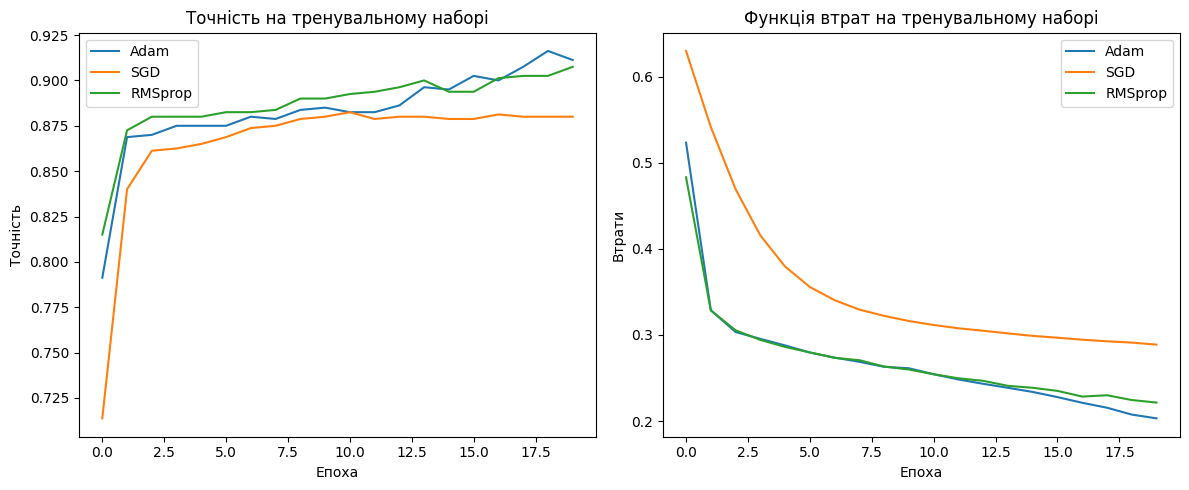

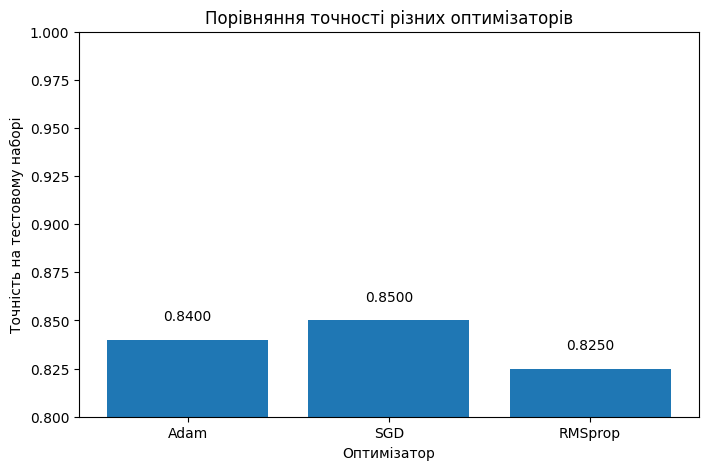

In [4]:
# Порівняння результатів
plt.figure(figsize=(12, 5))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop')
plt.title('Точність на тренувальному наборі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

# Графік функції втрат
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam')
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_rmsprop.history['loss'], label='RMSprop')
plt.title('Функція втрат на тренувальному наборі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

# Порівняння точності на тестовому наборі
optimizers = ['Adam', 'SGD', 'RMSprop']
accuracies = [accuracy, accuracy_sgd, accuracy_rmsprop]

plt.figure(figsize=(8, 5))
plt.bar(optimizers, accuracies)
plt.title('Порівняння точності різних оптимізаторів')
plt.xlabel('Оптимізатор')
plt.ylabel('Точність на тестовому наборі')
plt.ylim(0.8, 1.0)  # Встановлюємо діапазон для кращої візуалізації різниці

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()


## Завдання 3: Побудова LSTM-моделі для прогнозування часових рядів

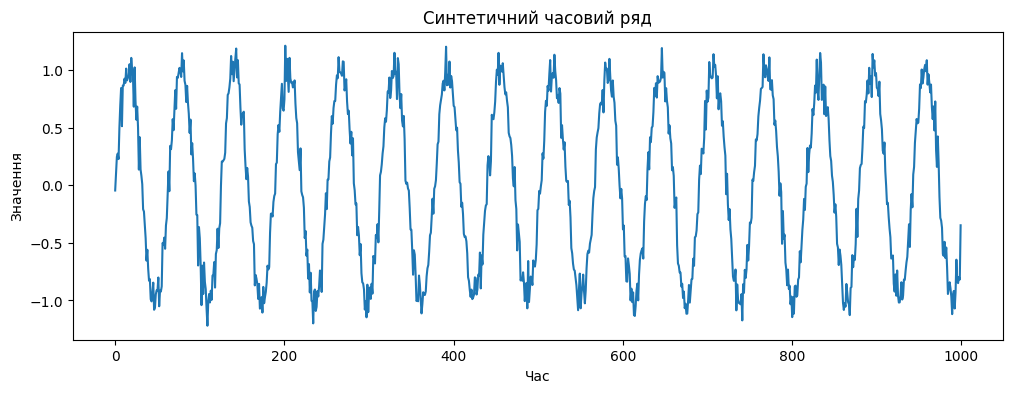

Форма тренувальних даних: (792, 10, 1)


In [5]:
import numpy as np
from tensorflow.keras.layers import LSTM

# Генерація синтетичних даних часового ряду
def create_time_series(n_samples=1000):
    time = np.arange(n_samples)
    # Створюємо синусоїду з шумом
    series = np.sin(0.1 * time) + np.random.normal(0, 0.1, size=n_samples)
    return series

# Підготовка даних для LSTM
def prepare_data(series, time_steps=10):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:i + time_steps])
        y.append(series[i + time_steps])
    return np.array(X), np.array(y)

# Створення часового ряду
time_series = create_time_series()

# Візуалізація часового ряду
plt.figure(figsize=(12, 4))
plt.plot(time_series)
plt.title('Синтетичний часовий ряд')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.show()

# Підготовка даних
time_steps = 10
X, y = prepare_data(time_series, time_steps)

# Розділення на тренувальний та тестовий набори
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Перетворення форми даних для LSTM [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f'Форма тренувальних даних: {X_train.shape}')


In [6]:
# Побудова моделі LSTM
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Компіляція моделі
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

# Навчання моделі
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

# Оцінка моделі
loss = lstm_model.evaluate(X_test, y_test)
print(f'Середньоквадратична помилка на тестовому наборі: {loss:.4f}')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
25/25 - 5s - loss: 0.4142 - val_loss: 0.2235 - 5s/epoch - 195ms/step
Epoch 2/50
25/25 - 0s - loss: 0.1478 - val_loss: 0.1004 - 409ms/epoch - 16ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0826 - val_loss: 0.0428 - 318ms/epoch - 13ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0274 - val_loss: 0.0204 - 278ms/epoch 

7/7 [==============================] - 0s 4ms/step


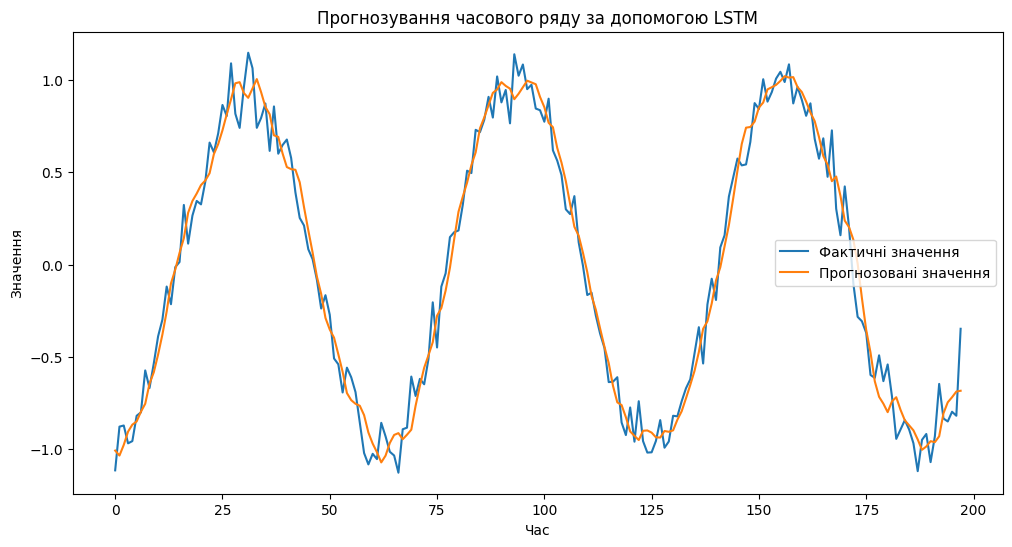

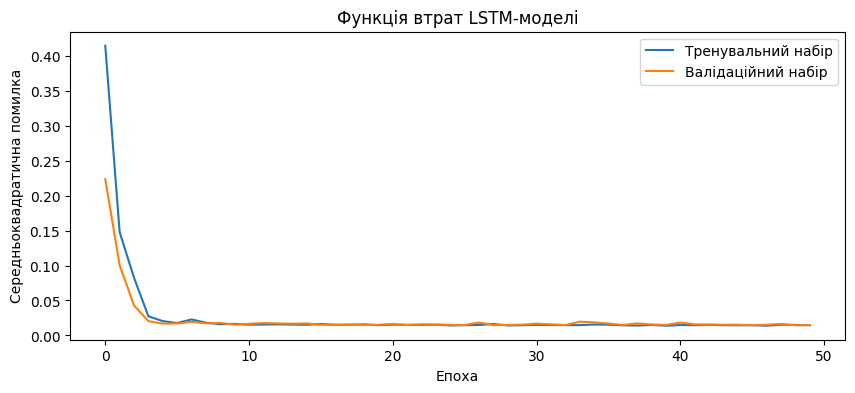

In [7]:
# Прогнозування
y_pred = lstm_model.predict(X_test)

# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Фактичні значення')
plt.plot(y_pred, label='Прогнозовані значення')
plt.title('Прогнозування часового ряду за допомогою LSTM')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.legend()
plt.show()

# Графік функції втрат під час навчання
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['loss'], label='Тренувальний набір')
plt.plot(history_lstm.history['val_loss'], label='Валідаційний набір')
plt.title('Функція втрат LSTM-моделі')
plt.xlabel('Епоха')
plt.ylabel('Середньоквадратична помилка')
plt.legend()
plt.show()


## Висновки

1. Ми створили та навчили просту нейромережу MLP для класифікації з використанням оптимізатора Adam.
2. Порівняли результати роботи різних оптимізаторів (Adam, SGD, RMSprop) та візуалізували їх ефективність.
3. Побудували LSTM-модель для прогнозування часових рядів та оцінили її точність.

Кожен оптимізатор має свої переваги та недоліки:
- Adam зазвичай швидко сходиться і дає хороші результати для більшості задач.
- SGD може бути повільнішим, але іноді знаходить кращі рішення для певних типів задач.
- RMSprop добре працює з рекурентними нейронними мережами.

LSTM-модель показала свою ефективність для прогнозування часових рядів завдяки здатності запам'ятовувати довгострокові залежності в даних.